In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
def extract_data(df_path, country):
    df = pd.read_csv(df_path)
    df = df[["dateRep", "day", "month", "year", "cases", "countriesAndTerritories"]]
    df = df[df.countriesAndTerritories == country]
    df = df.sort_values(["year", "month","day"])
    df.to_csv(df_path[:-4] + "_" + country.lower() + ".csv", index=False)
#extract_data("data/europe_timeseries.csv", "Germany")

def time_interval(df, start, end):
    """
    :param str start: yyyy-mm-dd
    :param str end: yyyy-mm-dd 
    """
    if (start == "start") & (end == "end"):
        return df
    elif (start == "start"):
        return df[df.dateRep < end]
    elif (end == "end"):
        return df[df.dateRep > start]
    else:
        return df[(start < df.dateRep) & (df.dateRep < end)]

In [20]:
df = pd.read_csv("data/europe_timeseries_germany.csv")
df.dateRep = pd.to_datetime(df.dateRep, format='%d/%m/%Y')
df_interval = time_interval(df, "2020-07-01", "end")

       dateRep  day  month  year  cases countriesAndTerritories
147 2020-07-02    2      7  2020  472.0                 Germany
148 2020-07-03    3      7  2020  426.0                 Germany
149 2020-07-04    4      7  2020  293.0                 Germany
150 2020-07-05    5      7  2020  143.0                 Germany
151 2020-07-06    6      7  2020  324.0                 Germany
152 2020-07-07    7      7  2020  392.0                 Germany
153 2020-07-08    8      7  2020  450.0                 Germany
154 2020-07-09    9      7  2020  424.0                 Germany
155 2020-07-10   10      7  2020  425.0                 Germany
156 2020-07-11   11      7  2020  276.0                 Germany


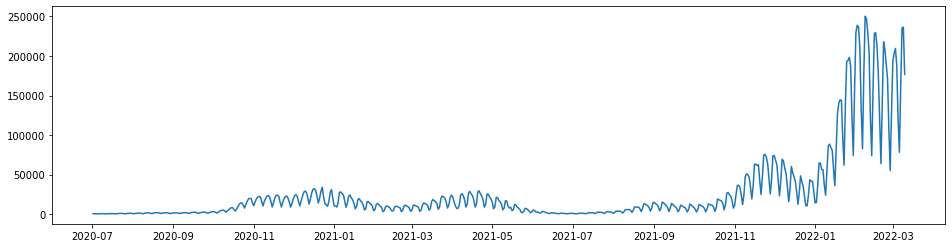

In [23]:
fig = plt.figure(figsize=(16,4))
print(df_interval.head(10))
plt.plot(df_interval.dateRep, df_interval.cases)